### 时间序列分析：

**时间序列**经常通过折线图绘制。时间序列用于统计，信号处理，模式识别，计量经济学，数学金融，天气预报，地震预测，脑电图，控制工程，天文学，通信工程，以及主要涉及时间测量的任何应用科学和工程领域。

时间序列数据是指在不同时间点上收集到的数据，这类数据反映了某一事物、现象等随时间的变化状态或程度，如我国国内生产总值从1949到2021的变化就是时间序列数据。时间序列数据可作季度数据、月度数据等细分。

时间序列分析包括用于分析时间序列数据的方法，以便提取有意义的统计数据和数据的其他特征。

时间序列数据具有自然的时间顺序。这使得时间序列分析不同于**横截面**(panel data)研究，其中没有观察的自然顺序。时间序列分析也不同于**空间数据**(spatial data)分析，其中观测通常与地理位置相关（例如，通过位置来计算房价以及房屋的内在特征）。一个随机的时间序列的模型通常会反映出这样一个事实，即与时间紧密相连的观测结果将比进一步分开的观察结果更加密切相关。此外，时间序列模型通常会利用时间的自然单向排序，因此给定时期的值将表示为从过去的值中获得，而不是从未来的值中获得。

时间序列分析可应用于实值，连续数据，离散数字数据。

#### 常用时间序列分析：

时间序列的常用算法包括移动平均（MA, Moving Average）、指数平滑（ES, Exponential Smoothing）、自回归移动平均模型（ARMA , Auto-regressive Moving Average Model）三大主要类别，每个类别又可以细分和延伸出多种算法。

本课程主要学习使用最简单的MA移动平均。。。

In [1]:
## Importing Packages and Data

import pandas as pd
import tushare as ts
import matplotlib.pyplot as plt
import getpass

tushare_token = getpass.getpass('Please input the token: ')
  # 请在 tushare.pro 网站注册并且告知学生身份，可以取得你的token
pro = ts.pro_api(tushare_token)

df = pro.daily(ts_code='000001.SZ', start_date='20200101', end_date='20201204')
cprice = df[['trade_date','close']].set_index('trade_date')
df

Please input the token:  ························································


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20201204,19.47,19.47,18.97,19.30,19.54,-0.24,-1.2282,891347.84,1707639.065
1,000001.SZ,20201203,19.78,19.86,19.17,19.54,19.63,-0.09,-0.4585,714452.30,1393085.020
2,000001.SZ,20201202,19.93,20.06,19.52,19.63,20.05,-0.42,-2.0948,889385.29,1758639.187
3,000001.SZ,20201201,19.70,20.51,19.40,20.05,19.74,0.31,1.5704,1263719.75,2516010.782
4,000001.SZ,20201130,19.90,20.88,19.59,19.74,19.70,0.04,0.2030,1581441.28,3213680.470
...,...,...,...,...,...,...,...,...,...,...,...
219,000001.SZ,20200108,17.00,17.05,16.63,16.66,17.15,-0.49,-2.8571,847824.12,1423608.811
220,000001.SZ,20200107,17.13,17.28,16.95,17.15,17.07,0.08,0.4687,728607.56,1247047.135
221,000001.SZ,20200106,17.01,17.34,16.91,17.07,17.18,-0.11,-0.6403,862083.50,1477930.193
222,000001.SZ,20200103,16.94,17.31,16.92,17.18,16.87,0.31,1.8376,1116194.81,1914495.474


In [4]:
cprice = df[['trade_date','close','open']].set_index('trade_date').iloc[::-1]
cprice

,close,open
trade_date,,
20200102,16.87,16.65
20200103,17.18,16.94
20200106,17.07,17.01
20200107,17.15,17.13
20200108,16.66,17.00
...,...,...
20201130,19.74,19.90
20201201,20.05,19.70
20201202,19.63,19.93


#### Panel data

also known as longitudinal data or cross-sectional time series data in some special cases, is data that is derived from a (usually small) number of observations over time on a (usually large) number of cross-sectional units like individuals, households, firms, or governments.


In the disciplines of **econometrics** and **statistics**, panel data refers to multi-dimensional data that generally involves measurements over some period of time. As such, panel data consists of researcher's observations of numerous phenomena that were collected over several time periods for the same group of units or entities. For example, a panel data set may be one that follows a given sample of individuals over time and records observations or information on each individual in the sample.

面板数据(Panel Data)，也叫“平行数据”，是指在时间序列上取多个截面，在这些截面上同时选取样本观测值所构成的样本数据。或者说他是一个m*n的数据矩阵，记载的是n个时间节点上，m个对象的某一数据指标。

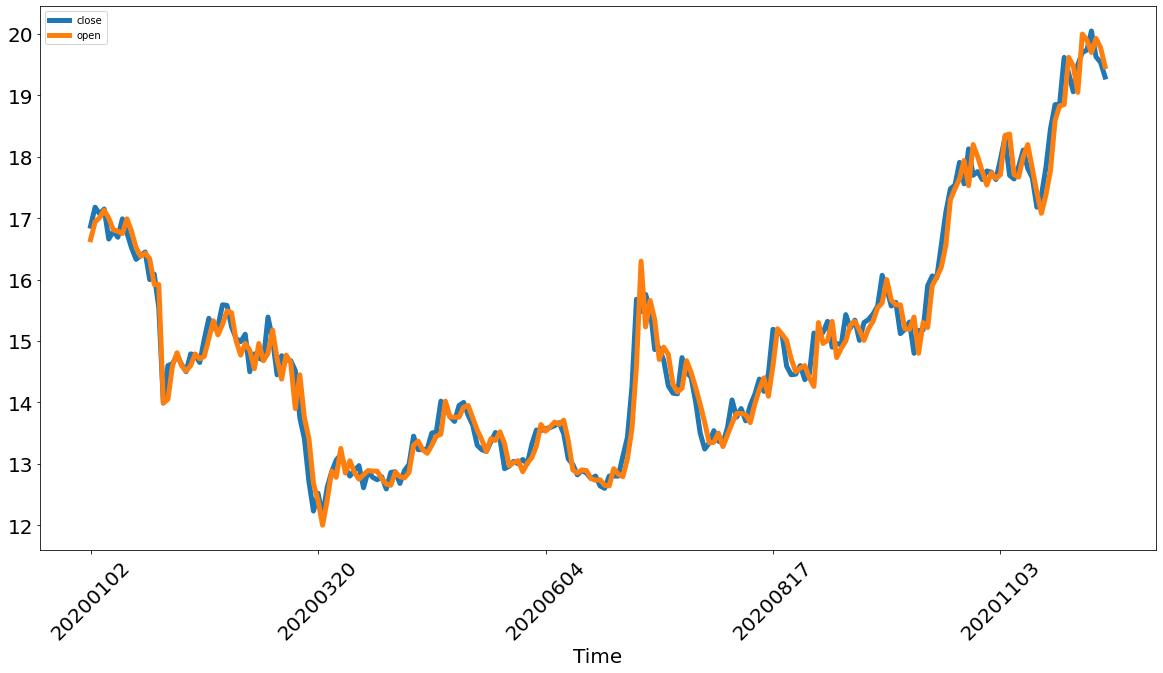

In [5]:
cprice.plot(figsize=(20,10), linewidth=5, fontsize=20, rot = 45)
plt.xlabel('Time', fontsize=20);

cprice.rolling(5).mean().plot(figsize=(20,10), linewidth=5, fontsize=20, use_index = True, rot = 45)
plt.xlabel('Date', fontsize=20);### Identifying Trends in Time Series

There are several ways to think about identifying trends in time series. One popular way is by taking a rolling average, which means that, for each time point, you take the average of the points on either side of it. Note that the number of points is specified by a window size, which you need to choose.

``pandas.DataFrame.rolling()`` is a function in pandas to identify the trend. A rolling window is used to find the moving average. 

In statistics, a moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set. In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.

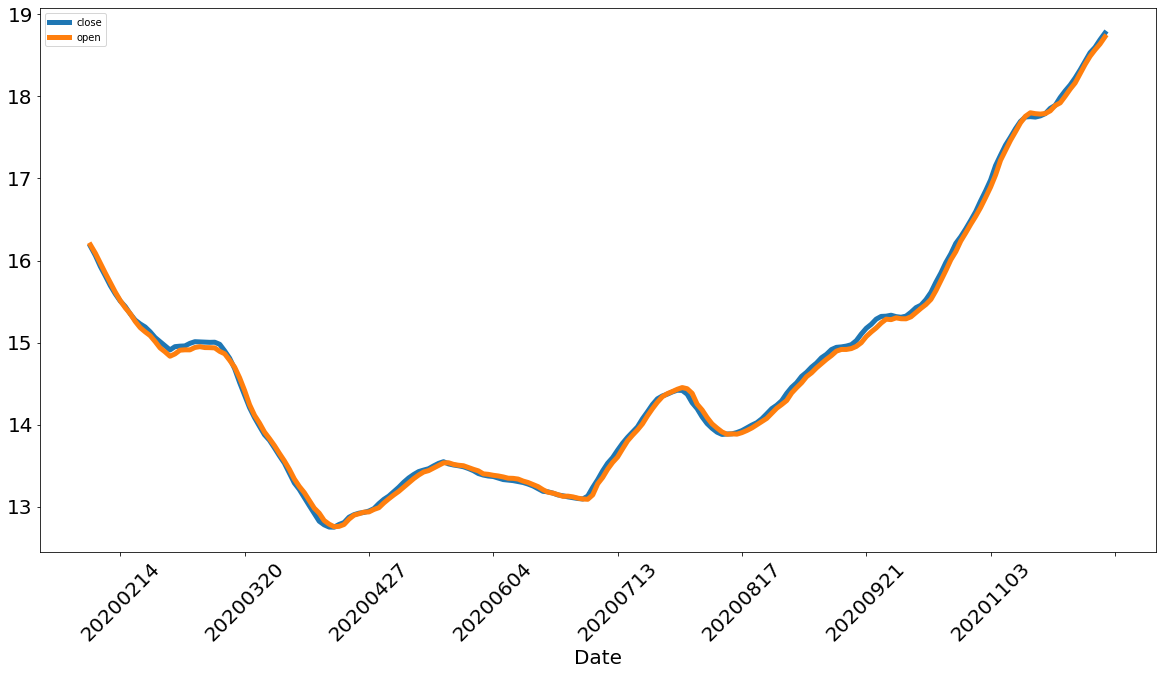

In [6]:
cprice.rolling(20).mean().plot(figsize=(20,10), linewidth=5, fontsize=20, use_index = True, rot = 45)
plt.xlabel('Date', fontsize=20);

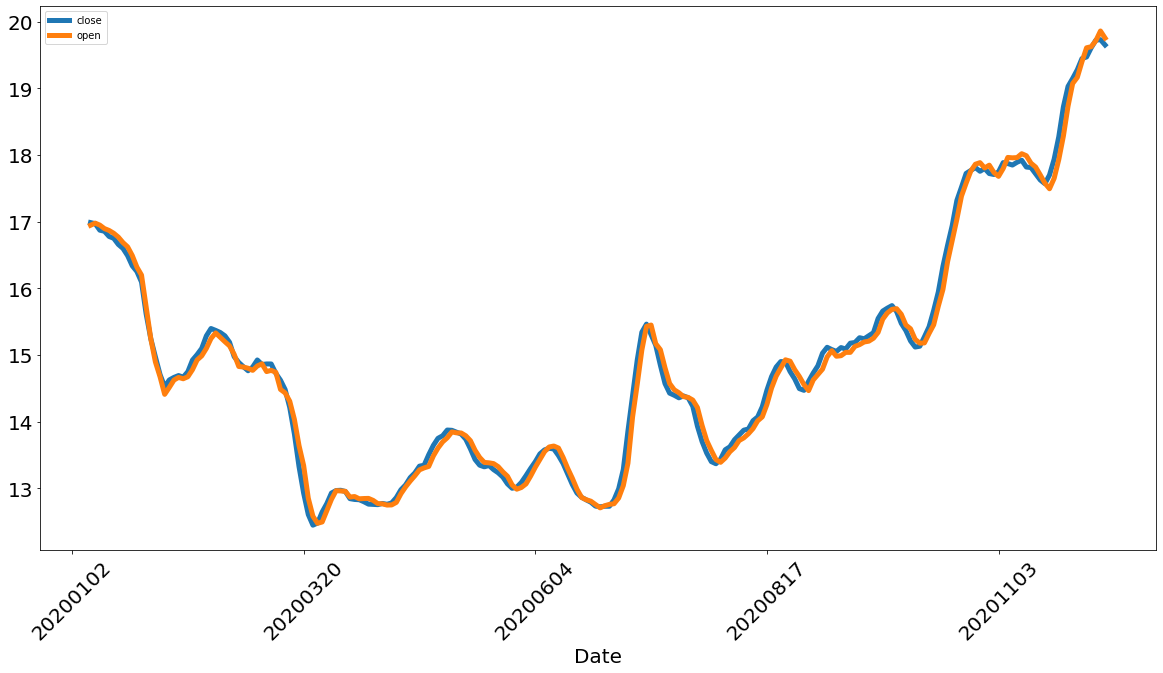

In [7]:
cprice.rolling(5).mean().plot(figsize=(20,10), linewidth=5, fontsize=20, use_index = True, rot = 45)
plt.xlabel('Date', fontsize=20);

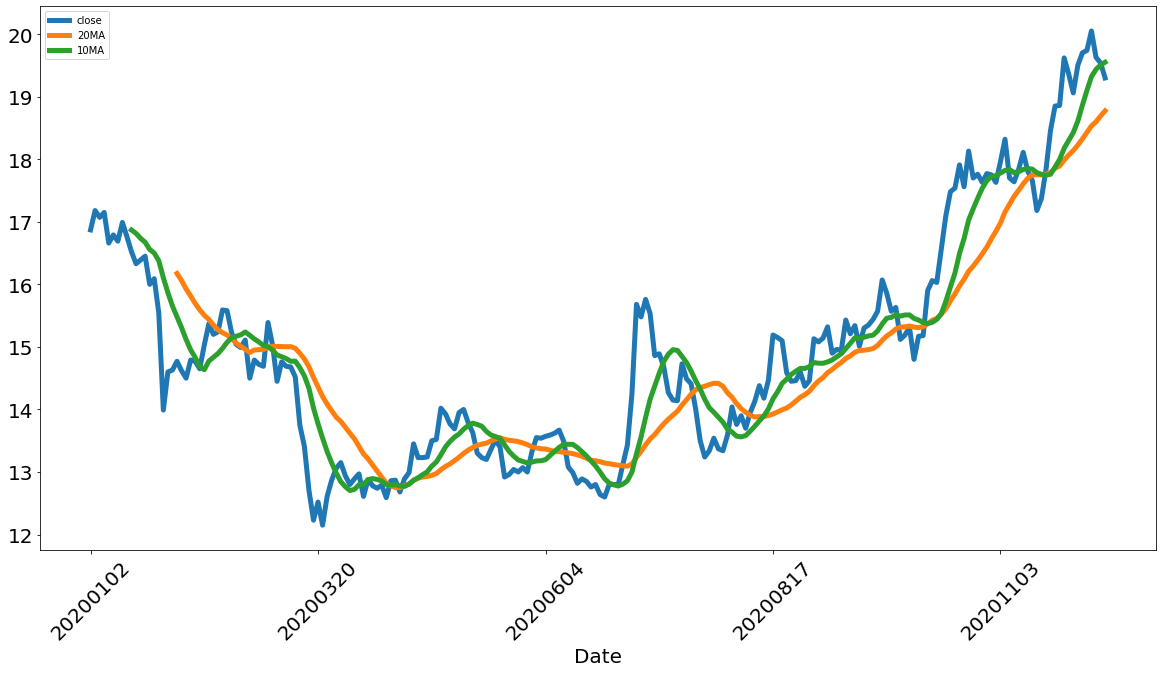

In [9]:
cprice = df[['trade_date','close']].set_index('trade_date').iloc[::-1]
cprice['20MA'] = cprice['close'].rolling(20).mean()
cprice['10MA'] = cprice['close'].rolling(10).mean()

cprice.plot(figsize=(20,10), linewidth=5, fontsize=20, use_index=True, rot = 45)
plt.xlabel('Date', fontsize=20);


In [10]:
cprice

,close,20MA,10MA
trade_date,,,
20200102,16.87,NaN,NaN
20200103,17.18,NaN,NaN
20200106,17.07,NaN,NaN
20200107,17.15,NaN,NaN
20200108,16.66,NaN,NaN
...,...,...,...
20201130,19.74,18.4285,19.098
20201201,20.05,18.5330,19.320
20201202,19.63,18.5985,19.437


A moving average can also act as support or resistance. In an uptrend, a 50-day, 100-day or 200-day moving average may act as a support level. This is because the average acts like a floor (support), so the price bounces up off of it. In a downtrend, a moving average may act as resistance; like a ceiling, the price hits the level and then starts to drop again.

#### 练习

“傻瓜式炒股法”——20日均线一根均线买入法，简单很实用！

股价向上突破20日均线

当股价经过一轮下跌后，已经跌无可跌了，股票一定会反弹。当股票经过调整向上突破20日均线并且是放量的，这就是技术上的买入点，这里需要注意的一点是要有成交量的配合，否则没有多大的意义。股价快速向上突破20日线并且稳稳站住，同时也有成交量放大的配合。当股价有效突破20日线后，一般涨幅都不会太小，这时投资者可以大胆买入。

#### EMA

Exponential moving average gives more weight to the recent prices and as a result of which, it can be a better model or better capture the movement of the trend in a faster way. EMA's reaction is directly proportional to the pattern of the data.

Since EMAs give a higher weight on recent data than on older data, they are more responsive to the latest price changes as compared to SMAs, which makes the results from EMAs more timely and hence EMA is more preferred over other techniques.

We can use the ``pandas.DataFrame.ewm()`` function to calculate the exponentially weighted moving average for a certain number of previous periods.

In [11]:
cprice

,close,20MA,10MA
trade_date,,,
20200102,16.87,NaN,NaN
20200103,17.18,NaN,NaN
20200106,17.07,NaN,NaN
20200107,17.15,NaN,NaN
20200108,16.66,NaN,NaN
...,...,...,...
20201130,19.74,18.4285,19.098
20201201,20.05,18.5330,19.320
20201202,19.63,18.5985,19.437


<AxesSubplot:xlabel='trade_date'>

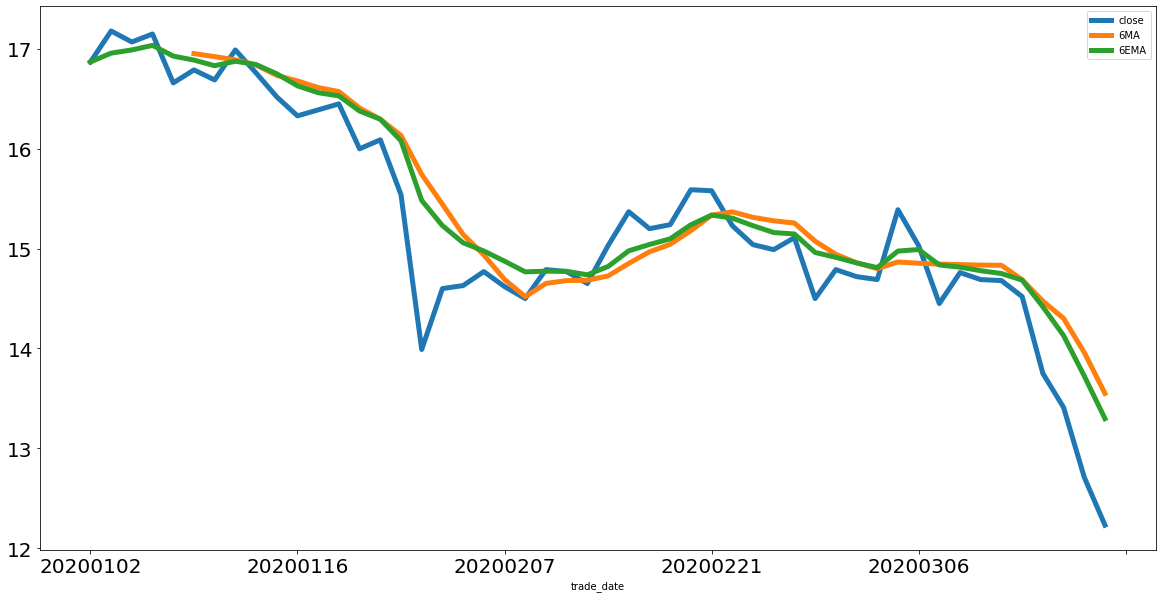

In [12]:
cprice['6EMA'] = cprice['close'].ewm(span=6, adjust=False).mean()
cprice['6MA'] = cprice['close'].rolling(6).mean()

cprice[['close','6MA','6EMA']].iloc[:50,:].plot(figsize=(20,10), linewidth=5, fontsize=20)

The EMA curve is more timely, or closer to the original (closing price) curve than the MA curve. 

#### Return

The formula for the total stock return is the appreciation in the price plus any dividends paid, divided by the original price of the stock. The income sources from a stock is dividends and its increase in value.

``pandas.dataframe - pandas.dataframe.shift(1)`` is same as ``pandas.dataframe.diff()``

<AxesSubplot:xlabel='trade_date'>

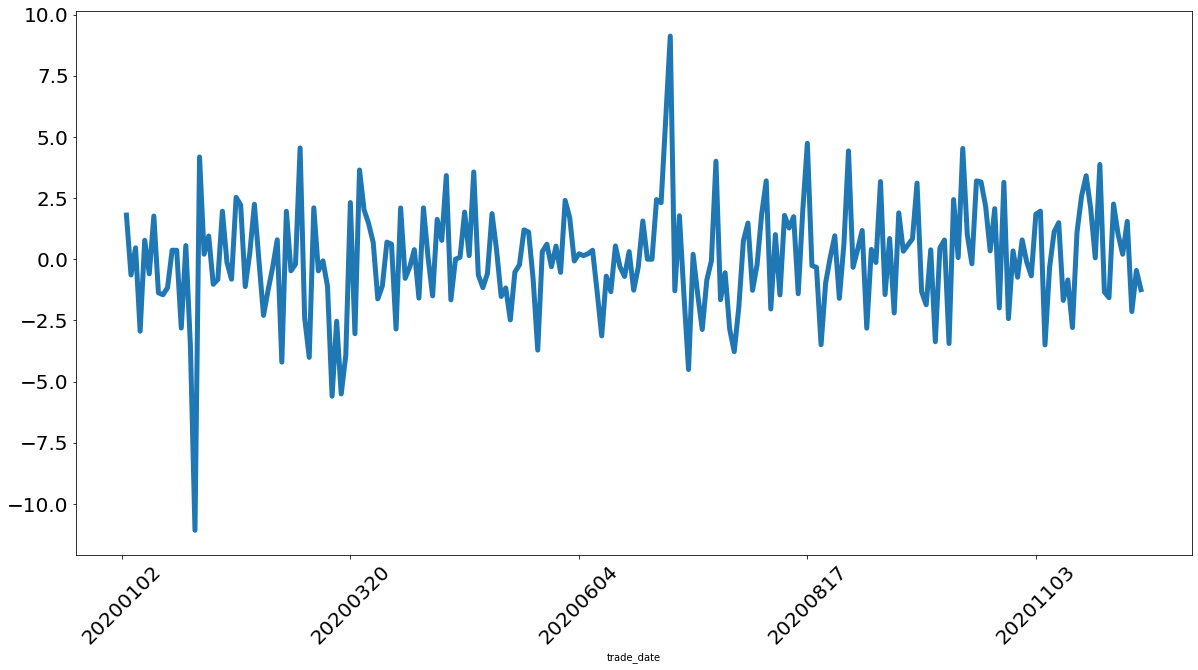

In [13]:
cprice['returns'] = 100 * cprice['close'].diff().div(cprice['close'])
cprice['returns'].plot(figsize=(20,10), linewidth=5, fontsize=20, use_index=True, rot = 45)

#### Variance/Standard Deviation (Volatility)

Simply put, volatility is a reflection of the degree to which price moves. A stock with a price that fluctuates wildly, hits new highs and lows, or moves erratically is considered highly volatile. A stock that maintains a relatively stable price has low volatility. A highly volatile stock is riskier.

When investing in a volatile security, the chance for success is increased as much as the risk of failure. 

**Volatility** is calculated by determining the mean price for the established period and then subtracting this figure from each price point. The differences are then squared, summed, and averaged to produce the variance.

Because the variance is the product of squares, it is no longer in the original unit of measure. Since price is measured in dollars, a metric that uses dollars squared is not very easy to interpret. Therefore, the standard deviation is calculated by taking the square root of the variance, which brings it back to the same unit of measure as the underlying data set.

**Volatility Formula**

1. Gather $N$ daily stock price and then determine the mean of the stock price. Let us assume the daily stock price on an $i$th day as $P_i$ and the mean price as $P_{a}$.

2. Next, compute the difference between each day’s stock price and the mean price, i.e., $P_i – P_{a}$.

3. Next, compute the square root of all the deviations, i.e. $\sqrt{\frac{1}{N}\sum_{i=1}^{N}{(P_{i} – P_a)^2}}$.

GARCH

In [15]:
import numpy as np

var = np.mean((cprice['close'] - cprice['close'].mean())**2)
std = np.sqrt(var)

print('The variance and standard deviation of price are {} and {}.'.format(np.round(var,2), np.round(std,2)))

The variance and standard deviation of price are 3.48 and 1.87.


#### Risk-adjusted return

This uses the risk-free rate of return and investment volatility in order to take an investment's risk level into account when calculating returns. A basic investment goal is to maximize the amount of return produced by investments relative to the total risk. In other words, a lower return by a low-risk investment can be a better risk-adjusted return than a superior return produced by a higher-risk investment. 





The **Sharpe ratio** was developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk.

Formula and Calculation of Sharpe Ratio
$$ \textit{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p} $$

where $R_{p}=\text{return of portfolio}$, $R_{f} = \text{risk-free rate}, \sigma_p = \text{standard deviation of the portfolio's excess return}$.

If we assume the risk-free rate is $1\%$.



In [34]:
rp = cprice['close'].mean()
sigma_r = np.sqrt(np.mean((cprice['close'] - cprice['close'].mean())**2))
rf = 0.01
sharpe_ratio = (rp - rf)/(sigma_r)

print('Sharpe_ratio is {}.'.format(np.round(sharpe_ratio,2)))

Sharpe_ratio is 9.95.


#### 练习

收集一批股票（如银行业），通过夏普比例的高低来选出最值得投资的组合。

``
stocks = pro.query('stock_basic', exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
``

#### Autocorrelation

Autocorrelation is the measure of the degree of similarity between a given time series and the lagged version of that time series over successive time periods. It is similar to calculating the correlation between two different variables except in Autocorrelation we calculate the correlation between two different versions $X_t$ and $X_{t-k}$ of the same time series.

Given time-series measurements, $Y_1, Y_2,\ldots,Y_N$ at time $X_1, X_2, \ldots, X_N$, the lag $k$ autocorrelation function is defined as:

$$r_k = \frac{\sum_{i=1}^{N-k}\left ( Y_i - \bar{Y}\right ) \left ( Y_{i+k} - \bar{Y} \right )}{\sum_{i=1}^{N-k}\left ( Y_i - \bar{Y}\right )^2}$$

Plotting the Autocorrelation Plot on a graph can be done using the ``pandas.DataFrame.plotting.autocorrelation_plot()`` method of the plotting module. This function generates the Autocorrelation plot for time series.

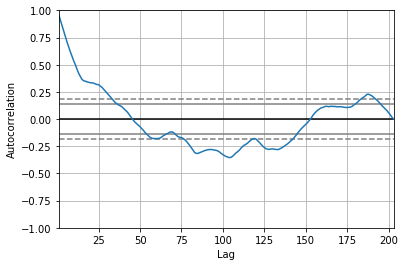

In [34]:
pd.plotting.autocorrelation_plot(cprice['close'])

#### Correlation

Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.

In finance, the correlation can measure the movement of a stock with that of a benchmark index, such as the CIS300, S&P500.

In [32]:
pro.index_basic(name='沪深300')

,ts_code,name,market,publisher,category,base_date,base_point,list_date
0,000300.SH,沪深300,SSE,中证公司,规模指数,20041231,1000.0,20050408


In [29]:
import seaborn as sns
start_date='20200101'
end_date='20201129'

cis300 = pro.index_daily(ts_code='000300.SH', start_date=start_date, end_date=end_date)
stk1 = pro.daily(ts_code='600000.SH', start_date=start_date, end_date=end_date)
stk2 = pro.daily(ts_code='000001.SZ', start_date=start_date, end_date=end_date)
df = pd.DataFrame()
df['cis300'] = cis300['close']
df['600000.SH'] = stk1['close']
df['000001.SZ'] = stk2['close']
df.corr()

,cis300,600000.SH,000001.SZ
cis300,1.000000,-0.246603,0.662647
600000.SH,-0.246603,1.000000,-0.084028
000001.SZ,0.662647,-0.084028,1.000000


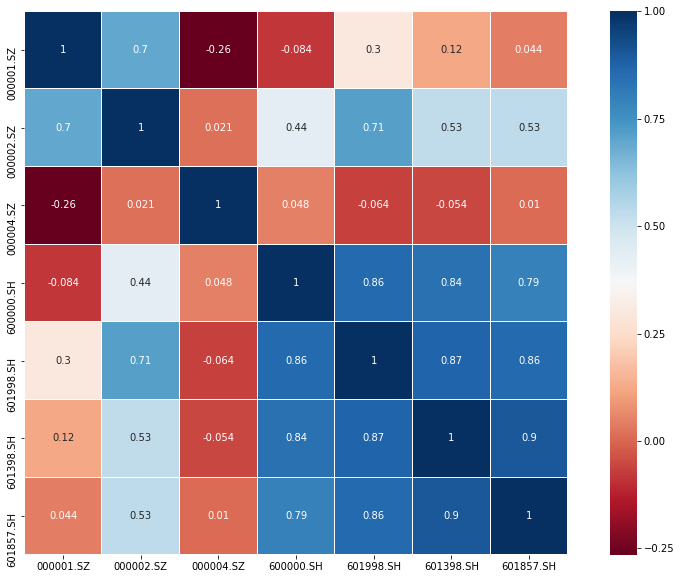

In [31]:
import seaborn as sns

def get_price(code):
    start_date='20200101'
    end_date='20201129'
    df = pro.daily(ts_code=code, start_date=start_date, end_date=end_date)
    return df['close']

stocks = ['000001.SZ','000002.SZ','000004.SZ','600000.SH','601998.SH','601398.SH','601857.SH']

df = pd.DataFrame()
for stock in stocks:
    df[stock] = get_price(stock)

colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))

svm = sns.heatmap(df.corr(), linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)